In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import re
from scipy import interpolate
from numpy import diff
from matplotlib import cm
import csv

import warnings


warnings.filterwarnings('ignore')





from tkinter.filedialog import askdirectory


########################################## ASKING FOR THE DIRECTORY OF THE RAW DATA ##########################################


path = askdirectory()
    
#Specifying folder containing the raw solar simulator data


In [2]:
#MAIN
date = path.split('/')[-2]
experiment = path.split('/')[-1]
print(experiment, date)



#initializing empty lists 
voc_table = []
jsc_table = []
ff_table = []
pce_table = []
file_table = []
sample_table = []

scan = '*_rev_*.txt'

#determining header size
list_i = []

j = 0
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:

        datareader = csv.reader(csvfile)

        j+=1
        i=1
        for row in datareader:
            i+=1
            if 'HEADER END' in str(row):
                list_i.append(i)
        
skipnum = pd.Series(list_i)



k = 0
#loading reverse scan daata
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as f:
        #print('r')

#determining sample name and corresponding file
        
        file = (filename.split("/")[-1]) 
        file_table.append(file)
        sample = re.split("[_.]", filename)[-7]
        sample_table.append(sample)
        


#loading the data into a dataframe
        df = pd.read_csv(f, sep='\t' , skiprows=skipnum[k])
        #print(df)
        k+=1
        
        df['Voltage'] = df.iloc[:,0] 
        df['Current'] = df.iloc[:,1]

#calculating the pce by finding the maximum product of current and voltage
        pce = max(df['Current']*df['Voltage'])

    

#selecting the region of the JV curve where the current changes sign
        inter1 = df[(df['Current'] < 15) & (df['Current'] > -15)]

#interpolating current data points in order to determine with higher precision Voc => J = 0 mA/cm2
        x = inter1['Voltage']
        y = inter1['Current']

#Excluding shorts
        if len(y) > 2 and x.max() > 0.5:
            f = interpolate.interp1d(x, y)
            xnew = np.linspace(x.min(), x.max(), 100000)
            ynew = f(xnew)
            newtable = pd.DataFrame()

            newtable['Current'] = ynew
            newtable['Voltage'] = xnew

#Voc is the voltage where J is closest to zero        
            Voc = min((newtable[abs(newtable['Current'])==abs(newtable['Current']).min()]['Voltage']))

#Jsc is the J value where V = 0
            
            Jsc = df[df['Voltage']==0]['Current'].max()

        else:
            Voc = 0
            Jsc = 0
            pce = 0

#FF is calculated by dividing PCE by Jsc times Voc
        if Jsc*Voc == 0:
            ff = 0
        else:
            ff = pce/(Jsc*Voc)

#Performance parameters are loaded into arrays
        voc_table.append(Voc)
        jsc_table.append(Jsc)
        ff_table.append(ff)
        pce_table.append(pce)
            
#initializing performance parameter dataframe
parameters = pd.DataFrame()

#loading sample names
parameters['Sample'] = sample_table
#loading performance parameters
parameters['Voc'] = voc_table
parameters['Jsc'] = jsc_table
parameters['FF'] = ff_table
parameters['PCE'] = pce_table

########################################## FWD SCANS ##########################################

#initializing empty lists 
voc_table = []
jsc_table = []
ff_table = []
pce_table = []
file_table = []
sample_table = []

#determining header size
list_i = []

scan = '*_fwd_*.txt'

j = 0
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:

        datareader = csv.reader(csvfile)

        j+=1
        i=1
        for row in datareader:
            i+=1
            if 'HEADER END' in str(row):
                list_i.append(i)
                #if i > 17:
                 #   print(filename, i)
                #print(row, i, str(csvfile)[-1:-4])
        
skipnum = pd.Series(list_i)

k = 0
#loading reverse scan daata
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as f:

#determining sample name and corresponding file
        
        file = (filename.split("/")[-1]) 
        file_table.append(file)
        sample = re.split("[_.]", filename)[-7]
        sample_table.append(sample)
        
#loading the data into a dataframe
        df = pd.read_csv(f, sep='\t',  skiprows=skipnum[k])
        k+=1
        
        df['Voltage'] = df.iloc[:,0] 
        df['Current'] = df.iloc[:,1]

#calculating the pce by finding the maximum product of current and voltage
        pce = max(df['Current']*df['Voltage'])


#selecting the region of the JV curve where the current changes sign
        inter1 = df[(df['Current'] < 15) & (df['Current'] > -15)]

#interpolating current data points in order to determine with higher precision Voc => J = 0 mA/cm2
        x = inter1['Voltage']
        y = inter1['Current']

#Excluding shorts
        if len(y) > 2 and x.max() > 0.5:
            f = interpolate.interp1d(x, y)
            xnew = np.linspace(x.min(), x.max(), 100000)
            ynew = f(xnew)
            newtable = pd.DataFrame()

            newtable['Current'] = ynew
            newtable['Voltage'] = xnew

#Voc is the voltage where J is closest to zero        
            Voc = min((newtable[abs(newtable['Current'])==abs(newtable['Current']).min()]['Voltage']))

#Jsc is the J value where V = 0
            
            Jsc = df[df['Voltage']==0]['Current'].max()

        else:
            Voc = 0
            Jsc = 0
            pce = 0

#FF is calculated by dividing PCE by Jsc times Voc
        if Jsc*Voc == 0:
            ff = 0
        else:
            ff = pce/(Jsc*Voc)

#Performance parameters are loaded into arrays
        voc_table.append(Voc)
        jsc_table.append(Jsc)
        ff_table.append(ff)
        pce_table.append(pce)
            
#initializing performance parameter dataframe
parameters_fwd = pd.DataFrame()

#loading sample names
parameters_fwd['Sample'] = sample_table
#loading performance parameters
parameters_fwd['Voc'] = voc_table
parameters_fwd['Jsc'] = jsc_table
parameters_fwd['FF'] = ff_table
parameters_fwd['PCE'] = pce_table






#Extracting the SPO values 
spo_table = pd.DataFrame(columns = ['Sample','SPO'])

power_table = []
sample_table = []

scan = '*_SPO_*.txt'

for filename in glob.glob(os.path.join(path, scan)):

    with open(filename, 'r') as f:
        
        sample = re.split("[_.]", filename)[-6] 

        data = pd.read_csv(f, sep='\t', error_bad_lines=False, skiprows=19)
        #power = data[data['TStamp']==data['TStamp'].max()]['Power']
        
        power = round(data.iloc[-5:,2].mean(),2)

        sample_table.append(sample)
        
        
        
        if (power > 0) and (power <30):
            power_table.append(float(power))
        else:
            power_table.append(0)


parameters.sort_values(by='Sample', inplace=True)
#loading sample names
spo_table['Sample'] = sample_table
#loading spo values
spo_table['SPO'] = power_table

#finding the max spo values 
max_spo = spo_table.groupby('Sample').max()
max_spo.reset_index(inplace=True)

#determining the max pce values and its corresponding performance parameters
max_pce_table = pd.DataFrame()
max_pce = []

df4 = pd.DataFrame()
df4 = parameters

#checking for "irregular" values
df4 = df4[df4['PCE']<25]

for i in range(df4.nunique()[0]):
        sample=df4['Sample'].unique() #determining the unique sample names
        if  df4[(df4[df4['Sample']==sample[i]]['PCE'].max()==df4['PCE']) & (df4['Sample'] == sample[i])]['PCE'].max()>0:
            pce_temp = df4[(df4[df4['Sample']==sample[i]]['PCE'].max()==df4['PCE']) & (df4['Sample'] == sample[i])] #finding the max pce per unique sample name
            
            max_pce.append(pce_temp) #each sample name with max pce and the corresponding parameters is added here
            
        else:
            pass

            
if len(max_pce)>0:
    max_pce_table = pd.concat(max_pce) #the individual dataframes of the samples are concatinated here
else:
    pass

if len(max_pce_table) > df4.nunique()[0]:
    max_pce_table = max_pce_table.groupby('Sample').max()

    
if len(max_pce_table.columns) == 4:
    print('reset')
    max_pce_table.reset_index(inplace=True)

#merging pce and spo tables 
if len(max_spo) > 2:
    
    max_table = pd.merge(max_pce_table, max_spo)
    max_table['hysteresis'] = max_table['SPO']/max_table['PCE']
else:
    max_table = max_pce_table

#calculating hysteresis as a ratio of SPO to PCE

#outputpath

analysis_path = os.path.join(os.path.expanduser("~"), "/Users/shabisre/NREL/Experiments/SolarSim/Analysis/") 
try:  
    os.mkdir(analysis_path+experiment)
except OSError as error:  
    pass 

output_path = analysis_path+experiment+'/'


#labeling the samples
spath = os.path.join(os.path.expanduser("~"),"/Users/shabisre/NREL/Experiments/SolarSim/SampleCodes/") 

labels = pd.DataFrame()
try:
    for filename in glob.glob(os.path.join(spath, experiment+ '*.xlsx')):
        print(filename)
        labels = pd.read_excel(filename)

    labels['Sample'] = labels['Sample'].astype(str)
    parameters = pd.merge(parameters, labels)
    parameters_fwd = pd.merge(parameters_fwd, labels)


    #if len(max_table.columns) < 5:
     #   max_table.reset_index(inplace=True)

    if len(max_table)>0:
        max_table = pd.merge(max_table, labels)
    else:
        pass

except:
    pass

def boxplot():
    for parameter in performance_params:

        if len(variable_1)>0:
            x = data[variable]
        else: 
            x = parameters.iloc[:,0]
        y = data[parameter][data[parameter]!=''].astype('float')

        ### remove outliers outside of confidence interval conf_int = 1 everything is included
        conf_int = 0.85
        
    
        removed_outliers = y.between(y.quantile(1-conf_int), y.quantile(0.975)) 
        Y = y[removed_outliers]
        
        if hue == None:
            ax = sns.swarmplot(x=variable,y=Y, data=data,hue=hue, color='darkgrey')
            
        else:
            pass
        ax = sns.boxplot(x=variable,y=Y, data=data, hue=hue)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
  
        if parameter == 'Jsc':

            plt.ylabel('J$_{SC}$ (mA/cm$^2$)')
        elif parameter == 'Voc':

            plt.ylabel('V$_{OC}$(V)')
        elif parameter == 'FF':
            plt.ylabel('FF')
        elif parameter == 'PCE':
            plt.ylabel('PCE (%)')
        elif parameter == 'SAMPLE':
            plt.ylabel('SPO (%)')
        plt.style.use('seaborn-talk')
        plt.tight_layout()

        export = output_path+experiment+'_'+parameter+'_'+str(n)
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()

variable_1 = []
variable_2 = []
variable_3 = []
variable_4 = []


data = max_table

if 'SPO' in data:
 #Sample (0), Voc (1), Jsc (2), FF (3), PCE (4), SPO (5), hysteresis (6), variable 1 (7), variable 2 (8), variable 3 (9)
    col_num = 8
    
    if len(data.columns) ==col_num:
        variable_1 = data.iloc[:,col_num-1]
    if len(data.columns) == col_num+1:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
    elif len(data.columns) == col_num+2:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
        variable_3 = data.iloc[:,col_num+1]
    elif len(data.columns) == col_num+3:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
        variable_3 = data.iloc[:,col_num+1]
        variable_4 = data.iloc[:,col_num+2]
        
    else:
        pass
else:
    col_num = 6
    if len(data.columns) ==col_num:
        variable_1 = data.iloc[:,col_num-1]
    if len(data.columns) == col_num+1:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
    elif len(data.columns) == col_num+2:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
        variable_3 = data.iloc[:,col_num+1]
    elif len(data.columns) == col_num+3:
        variable_1 = data.iloc[:,col_num-1]
        variable_2 = data.iloc[:,col_num]
        variable_3 = data.iloc[:,col_num+1]
        variable_4 = data.iloc[:,col_num+2]
    else:
        pass


#exporting a table of max values per sample
max_table.to_excel(output_path +experiment+'_max_table_'+date+'.xlsx', index = False) 
#exporting all performance parameters 
parameters.to_excel(output_path+experiment+'_JVparameters_'+date+'.xlsx', index = False)


max_table.head(5)
if 'SPO' in max_table.columns:
    champion_device = max_table[max_table['SPO'] ==max_table['SPO'].max()]
    champion_device
else:
    parameters

SNH_604 210730
/Users/shabisre/NREL/Experiments/SolarSim/SampleCodes/SNH_604_sampleCodes.xlsx


In [3]:
labels

,Sample,PbI2
0,2305,SA 2x9
1,2306,SA 2x9
2,2307,SA 2x9
3,2308,SA 5x9
4,2309,SA 5x9
5,2311,SA 5x9
6,2312,AA 4x9
7,2313,AA 4x9
8,2314,AA 4x9
9,2315,AA 5x9


1


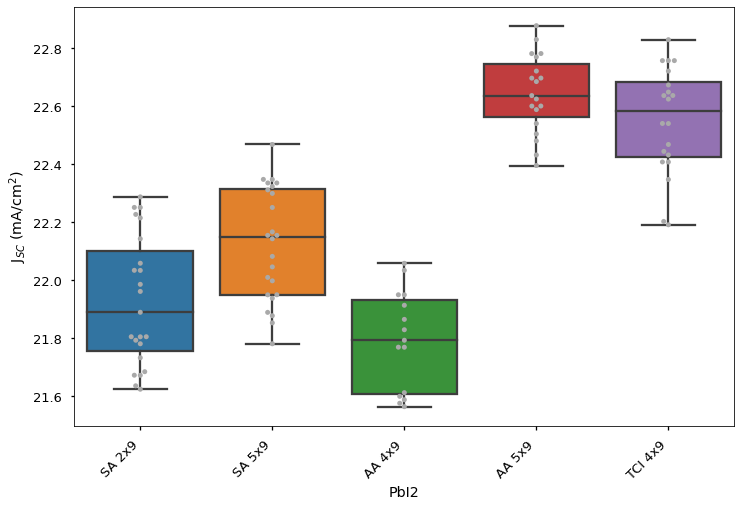

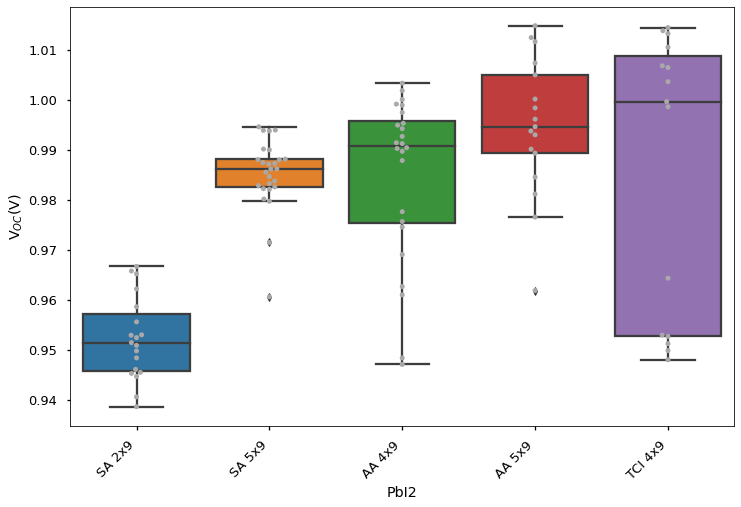

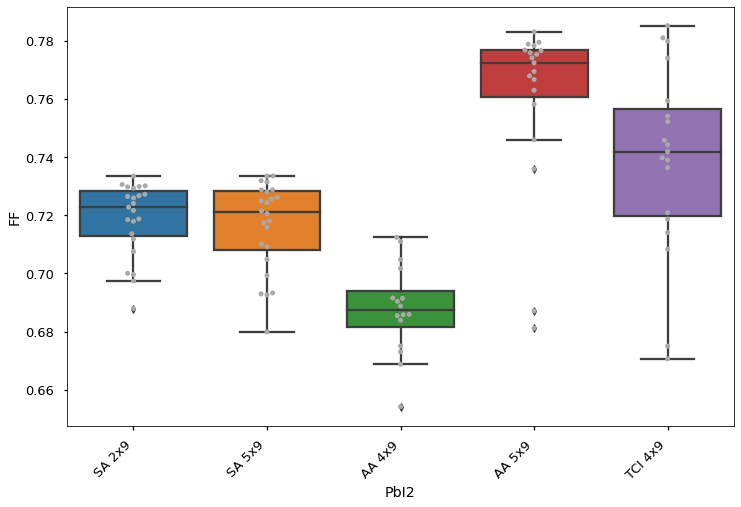

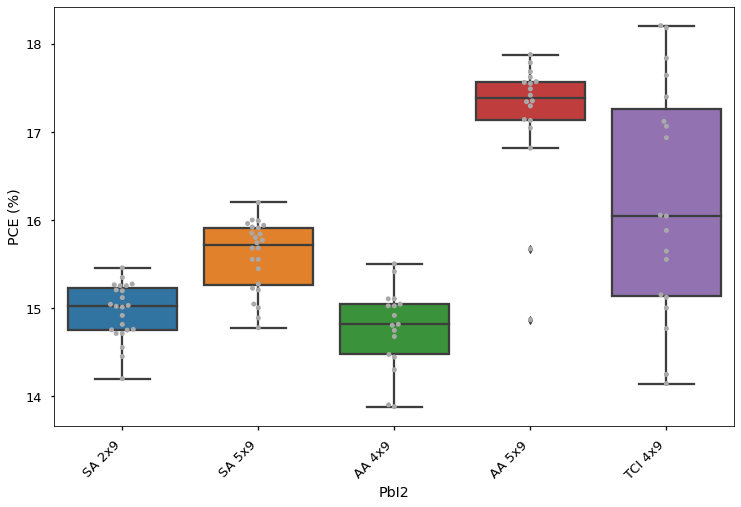

In [5]:
### Boxplots of the various variables (rev scan)


data = parameters


if len(data.columns) == 6:
    n_count = 1
    param_num = 1
elif len(data.columns) == 7:
    n_count = 4
    param_num = 2
elif len(data.columns) == 8:
    n_count = 6
    param_num = 3
elif len(data.columns) == 9:
    n_count = 9
    param_num = 4
else:
    param_num = 0
    n_count = 1

print(n_count)
column_num = len(data.columns)-param_num
for n in range(n_count):

    performance_params =['Jsc', 'Voc', 'FF', 'PCE']
    
    #if n == 0:
     #   variable = data.iloc[0].reset_index()['index'][0]
      #  hue = None
    
       # boxplot()
    if n < len(data.columns)-5:
        variable = data.iloc[0].reset_index()['index'][column_num+n] #single parameter
        hue = None
        boxplot()
            
    elif n == len(data.columns)-5:
        print('number', n)

        variable = data.iloc[0].reset_index()['index'][column_num]
        hue = data.iloc[0].reset_index()['index'][column_num+1]

        boxplot()
        
    elif n == len(data.columns)-4:
        variable = data.iloc[0].reset_index()['index'][column_num]
        hue = data.iloc[0].reset_index()['index'][column_num+2]

        boxplot()
            
    elif n == len(data.columns)-3:
        variable = data.iloc[0].reset_index()['index'][column_num+1]
        hue = data.iloc[0].reset_index()['index'][column_num+2]
        
        boxplot()
        
    elif n == len(data.columns)-2:
        variable = data.iloc[0].reset_index()['index'][column_num+2]
        hue = data.iloc[0].reset_index()['index'][column_num+3]
        

        boxplot()
        
 
        
        
    else:
        
    
        pass

    

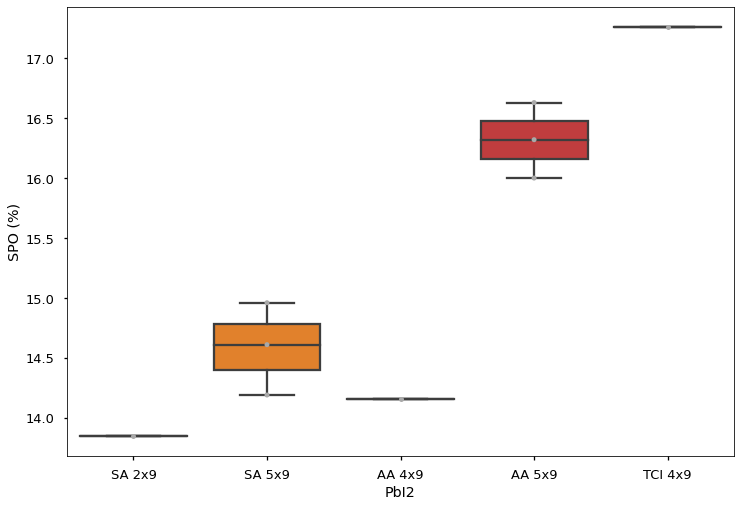

In [6]:
# SPO plots max 
plt.style.use('seaborn-talk')

data = max_table

if 'SPO' in max_table.columns:
    
    y  = data['SPO']
        
    if (len(variable_2)>0) and (len(variable_3) == 0):
        for n in range(3):
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x  = variable_1
                hue = variable_2
            else:
                pass
            #ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('SPO (%)')
            plt.tight_layout()
            export = output_path+experiment+'_'+'SPO_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
            
            
    elif len(data.columns) == 10:
        for n in range(6):
            data = max_table
            y = data['SPO']
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x = variable_3
                hue = None
            
            elif n == 3: 
                x  = variable_1
                hue = variable_2
            elif n == 4:
                x  = variable_1
                hue = variable_3
            elif n == 5:
                x  = variable_2
                hue = variable_3
            else:
                pass
            #if hue == None:
             #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            #else:
             #   pass
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('SPO (%)')
            plt.tight_layout()
            export = output_path+experiment+'_'+'SPO_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()

    elif len(data.columns) == 11:
        for n in range(9):
            data = max_table
            y = data['SPO']
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x = variable_3
                hue = None
            elif n == 3:
                x = variable_4
                hue = None
            
            
            elif n == 4: 
                x  = variable_1
                hue = variable_2
            elif n == 5:
                x  = variable_1
                hue = variable_3
            elif n == 6:
                x  = variable_1
                hue = variable_4
                
            elif n == 7: 
                x  = variable_2
                hue = variable_3
            elif n == 8:
                x  = variable_2
                hue = variable_4
  
            elif n == 9:
                x  = variable_3
                hue = variable_4   
                
                

                
            else:
                pass
            #if hue == None:
             #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            #else:
             #   pass
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('SPO (%)')
            plt.tight_layout()
            export = output_path+experiment+'_'+'SPO_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
        
        
    else:

        hue = None
        x = variable_1
        
        ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
        ax = sns.boxplot(x,y,  data=data, hue=hue)
        
    
        plt.ylabel('SPO (%)')
        plt.tight_layout()
        export = output_path+experiment+'_'+'SPO'
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()

else:
    pass

Two variables
0


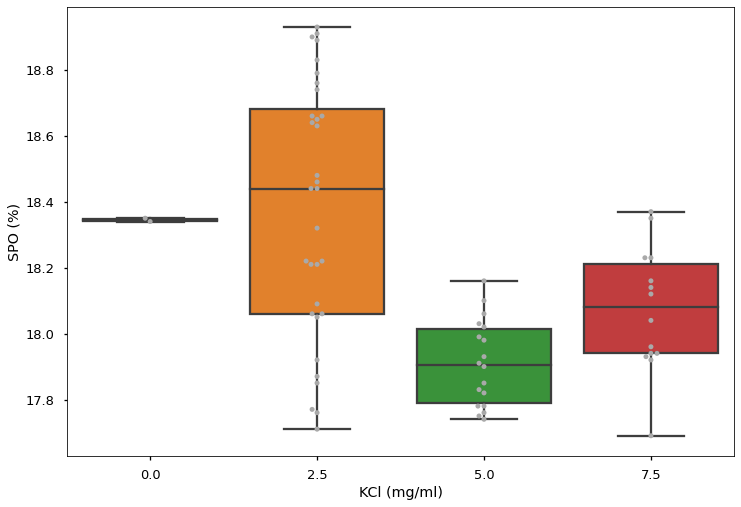

1


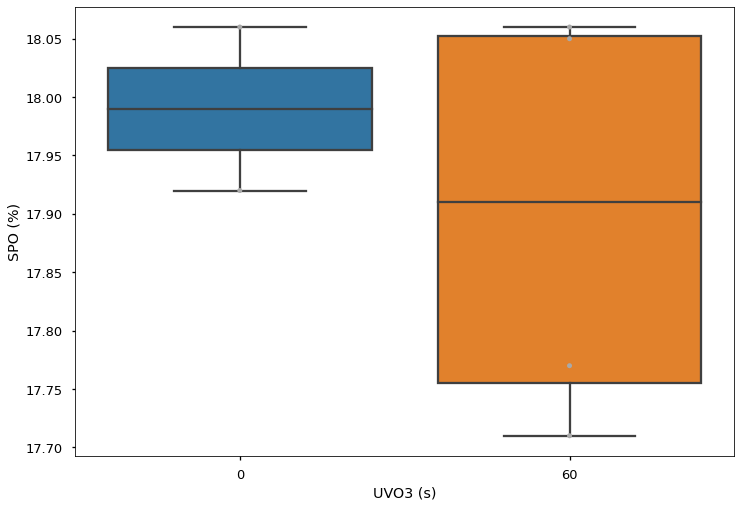

2


IndexError: Boolean index has wrong length: 3 instead of 2

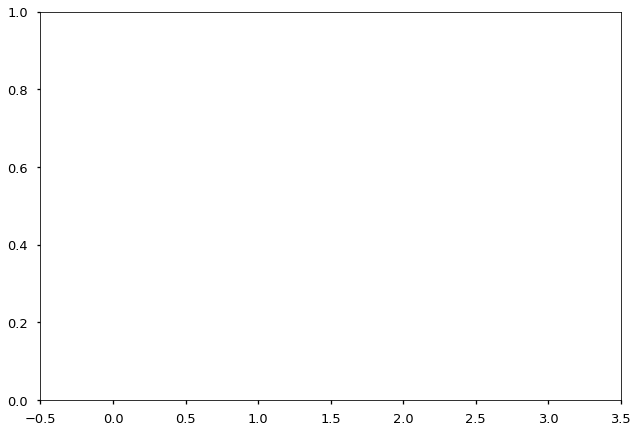

In [8]:
###SPO distribution

plt.style.use('seaborn-talk')


data2 = pd.merge(spo_table, labels)
data2.sort_values('Sample', ascending=True, inplace=True)


y  = data2['SPO']

if (len(variable_2)>0) and (len(variable_3) == 0):
    
    print('Two variables')
    for n in range(3):
        print(n)
        if n == 0:
            x = data2.iloc[:,2]
            hue = None
        elif n == 1:
            x = variable_2
            hue = None
        elif n == 2:
            x  = variable_1
            hue = variable_2
        else:
            pass
        
        conf_int = 0.7
        removed_outliers = y.between(y.quantile(1-conf_int), y.quantile(1)) 
        Y = y[removed_outliers]
        
        ax = sns.swarmplot(x,Y, hue=hue, color='darkgrey')
        ax = sns.boxplot(x,Y, hue=hue)

        plt.ylabel('SPO (%)')
        plt.tight_layout()
        export = output_path+experiment+'_'+'SPO2_'+str(n)
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()


elif (len(variable_3)>0) and (len(variable_4) ==0):
    print('Three variables')
    
    for n in range(6):
        
        if n == 0:
            x = variable_1.name
            hue = None
        elif n == 1:
            x = variable_2.name
            hue = None
        elif n == 2:
            x = variable_3.name
            hue = None

        elif n == 3: 
            x  = variable_1.name
            hue = variable_2.name
        elif n == 4:
            x  = variable_1.name
            hue = variable_3.name
        elif n == 5:
            x  = variable_2.name
            hue = variable_3.name
        else:
            pass

        conf_int = 0.7
        removed_outliers = y.between(y.quantile(1-conf_int), y.quantile(1)) 
        Y = y[removed_outliers]
        
        if hue == None:
            ax = sns.swarmplot(x,Y, data = data2, color='darkgrey')
        ax = sns.boxplot(x,Y, hue=hue, data = data2)
        
    
        plt.ylabel('SPO (%)')
        plt.tight_layout()
        export = output_path+experiment+'_'+'SPO2_'+str(n)
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()

elif len(variable_4) > 4:
    print('Four variables')
    for n in range(9):
        data = data2
        y = data['SPO']
        if n == 0:
            x = variable_1
            hue = None
        elif n == 1:
            x = variable_2
            hue = None
        elif n == 2:
            x = variable_3
            hue = None
        elif n == 3:
            x = variable_4
            hue = None

        elif n == 4: 
            x  = variable_1
            hue = variable_2
        elif n == 5:
            x  = variable_1
            hue = variable_3
        elif n == 6:
            x  = variable_1
            hue = variable_4

        elif n == 7: 
            x  = variable_2
            hue = variable_3
        elif n == 8:
            x  = variable_2
            hue = variable_4

        elif n == 9:
            x  = variable_3
            hue = variable_4   

        else:
            pass
        #if hue == None:
         #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
        #else:
         #   pass
        ax = sns.boxplot(x,y,  data=data2, hue=hue)
        ax = sns.swarmplot(x,y, data=data2, hue=hue, color='darkgrey')
        
        

        plt.ylabel('SPO (%)')
        plt.tight_layout()
        export = output_path+experiment+'_'+'SPO2_'+str(n)
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()


else:
    print('one variable')
    y = data2['SPO']

    conf_int = 0.95
    removed_outliers = y.between(y.quantile(1-conf_int), y.quantile(1)) 
    Y = y[removed_outliers]
    
    x = data2.iloc[:,2]
 
    ax = sns.swarmplot(x,Y,hue=hue, color='darkgrey')
    ax = sns.boxplot(x,Y, hue=hue)


    plt.ylabel('SPO (%)')
    plt.tight_layout()
    export = output_path+experiment+'_'+'SPO2'
    plt.savefig(export, dpi = 300) #Saves file at with parameter name
    plt.show()


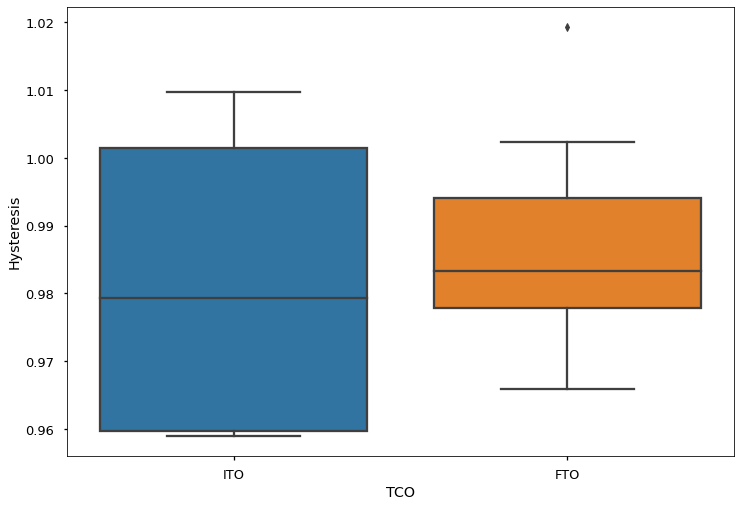

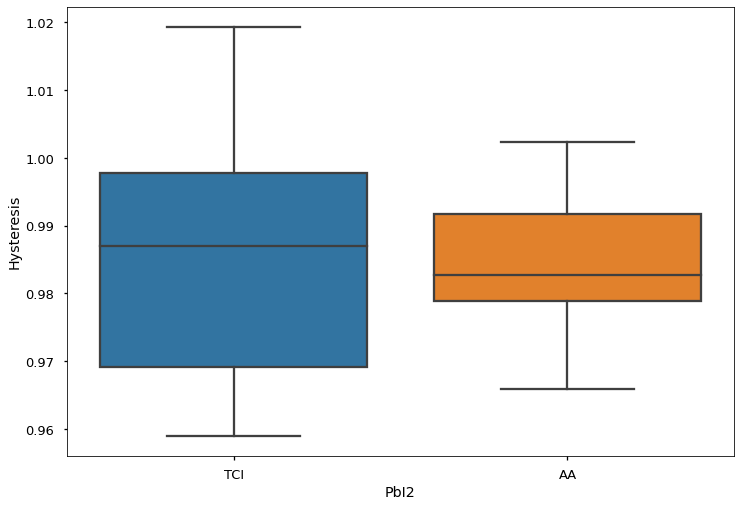

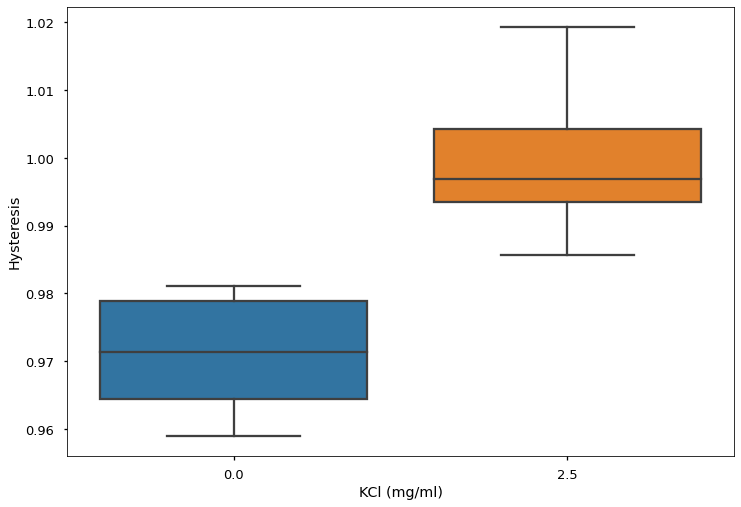

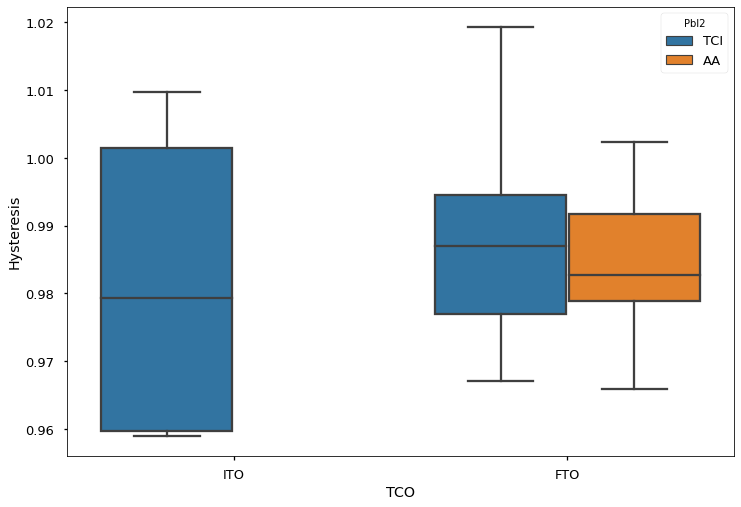

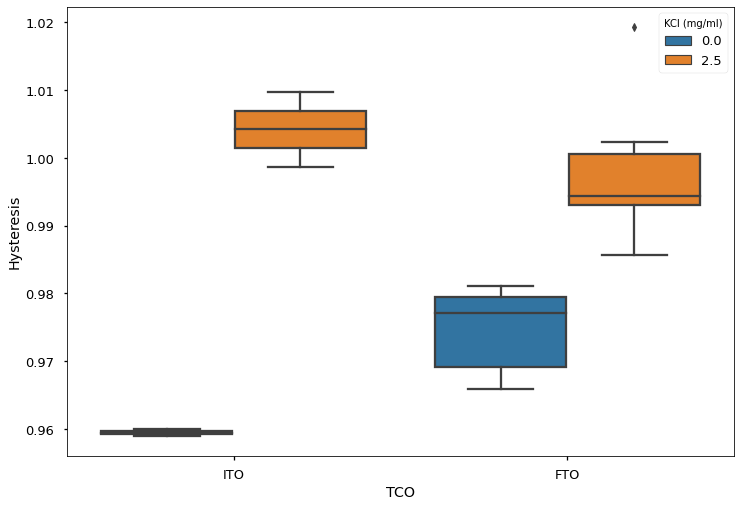

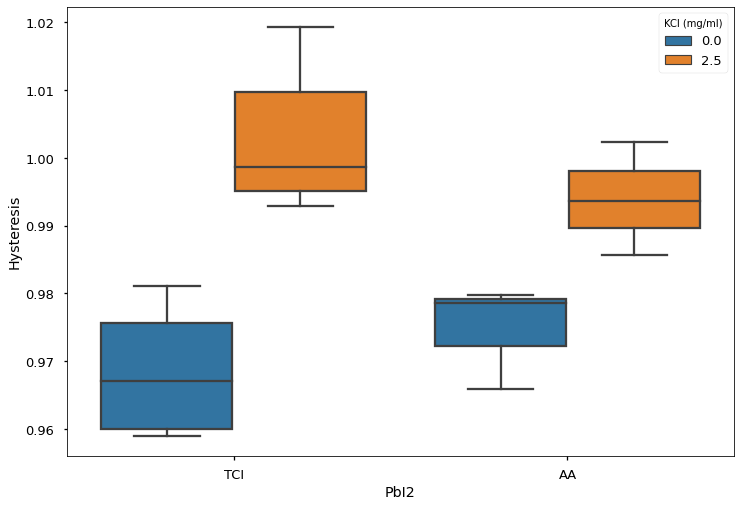

In [12]:
# Hysteresis plots max 
plt.style.use('seaborn-talk')

data = max_table

if 'hysteresis' in data.columns:
    
    y  = data['hysteresis']
        
    if (len(variable_2)>0) and (len(variable_3) == 0):
        for n in range(3):
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x  = variable_1
                hue = variable_2
            else:
                pass
            #ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('Hysteresis')
            plt.tight_layout()
            export = output_path+experiment+'_'+'hysteresis_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
            
            
    elif len(data.columns) == 10:
        for n in range(6):
            data = max_table
            y = data['hysteresis']
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x = variable_3
                hue = None
            
            elif n == 3: 
                x  = variable_1
                hue = variable_2
            elif n == 4:
                x  = variable_1
                hue = variable_3
            elif n == 5:
                x  = variable_2
                hue = variable_3
            else:
                pass
            #if hue == None:
             #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            #else:
             #   pass
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('Hysteresis')
            plt.tight_layout()
            export = output_path+experiment+'_'+'hysteresis_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()

    elif len(data.columns) == 11:
        for n in range(9):
            data = max_table
            y = data['hysteresis']
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x = variable_3
                hue = None
            elif n == 3:
                x = variable_4
                hue = None
            
            
            elif n == 4: 
                x  = variable_1
                hue = variable_2
            elif n == 5:
                x  = variable_1
                hue = variable_3
            elif n == 6:
                x  = variable_1
                hue = variable_4
                
            elif n == 7: 
                x  = variable_2
                hue = variable_3
            elif n == 8:
                x  = variable_2
                hue = variable_4
  
            elif n == 9:
                x  = variable_3
                hue = variable_4   
                
                

                
            else:
                pass
            #if hue == None:
             #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            #else:
             #   pass
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('Hysteresis')
            plt.tight_layout()
            export = output_path+experiment+'_'+'hysteresis_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
        
        
    else:

        hue = None
        x = variable_1
        
        ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
        ax = sns.boxplot(x,y,  data=data, hue=hue)
        
    
        plt.ylabel('Hysteresis')
        plt.tight_layout()
        export = output_path+experiment+'_'+'hysteresis'
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()

else:
    pass

3
0


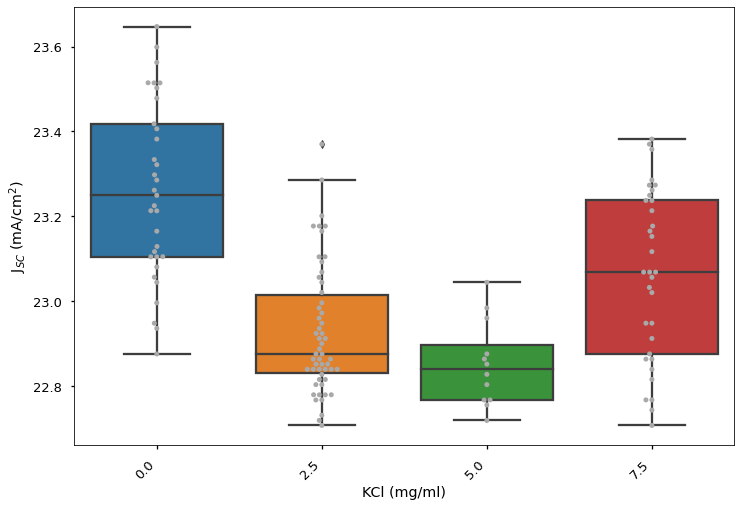

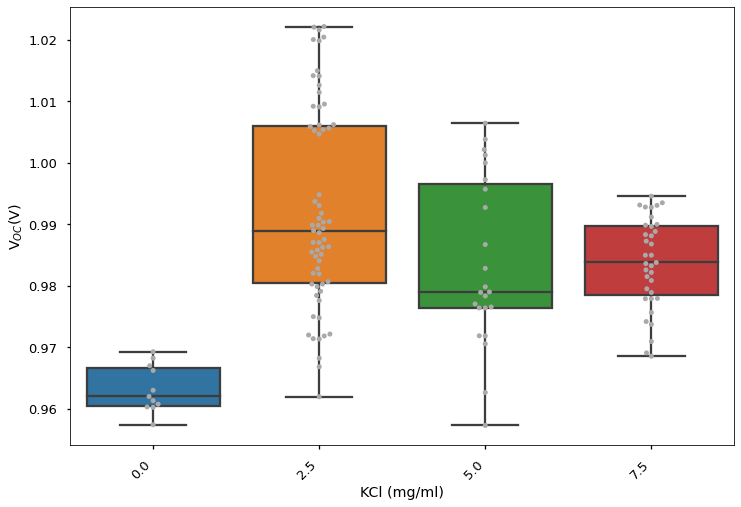

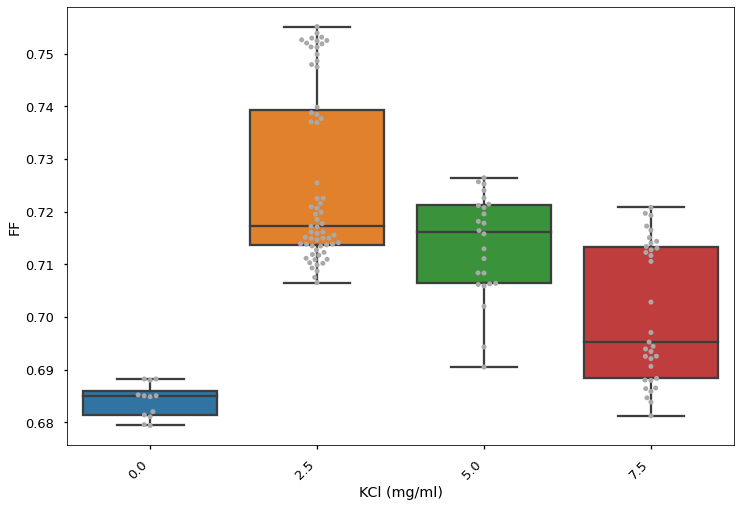

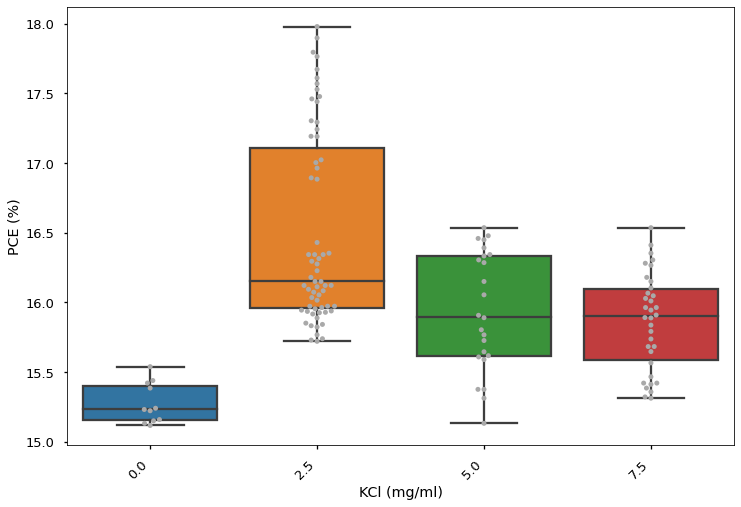

variable 1 vs variable 2


KeyError: 6

In [11]:
### Boxplots of the various variables (fwd scan)


data = parameters_fwd


if len(data.columns) == 6:
    n_count = 3
    param_num = 1
elif len(data.columns) == 7:
    n_count = 4
    param_num = 2
elif len(data.columns) == 8:
    n_count = 6
    param_num = 3
    
elif len(data.columns) == 9:
    n_count = 9
    param_num = 4
else:
    param_num = 0
    n_count = 1

print(n_count)
column_num = len(data.columns)-param_num
for n in range(n_count):

    performance_params =['Jsc', 'Voc', 'FF', 'PCE']
    
    
    
    if n < len(data.columns)-5:
        print(n)

        variable = data.iloc[0].reset_index()['index'][column_num+n] #single parameter
        hue = None
        boxplot()
            
    elif n == len(data.columns)-5:
        print('variable 1 vs variable 2')
        variable = data.iloc[0].reset_index()['index'][column_num]
        hue = data.iloc[0].reset_index()['index'][column_num+1]

        boxplot()
        
    elif n == len(data.columns)-4:
        variable = data.iloc[0].reset_index()['index'][column_num]
        hue = data.iloc[0].reset_index()['index'][column_num+2]

        boxplot()
            
    elif n == len(data.columns)-3:
        variable = data.iloc[0].reset_index()['index'][column_num+1]
        hue = data.iloc[0].reset_index()['index'][column_num+2]
        
        boxplot()
        
    elif n == len(data.columns)-2:
        variable = data.iloc[0].reset_index()['index'][column_num+2]
        hue = data.iloc[0].reset_index()['index'][column_num+3]
        

        boxplot()
    else:

        boxplot()



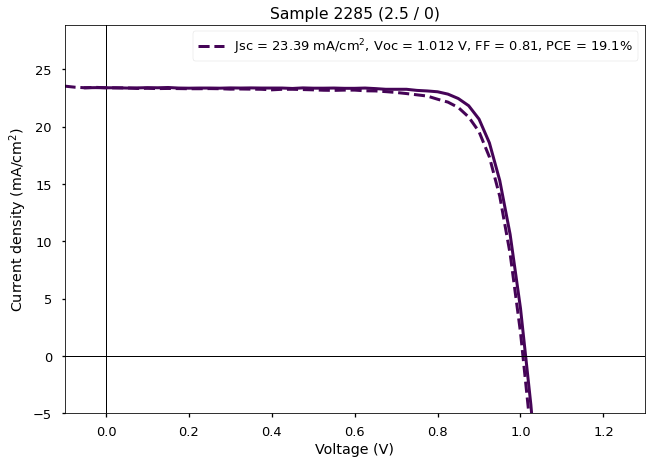

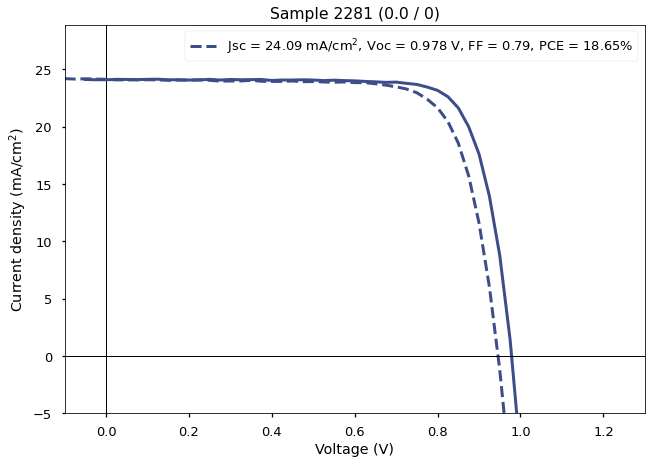

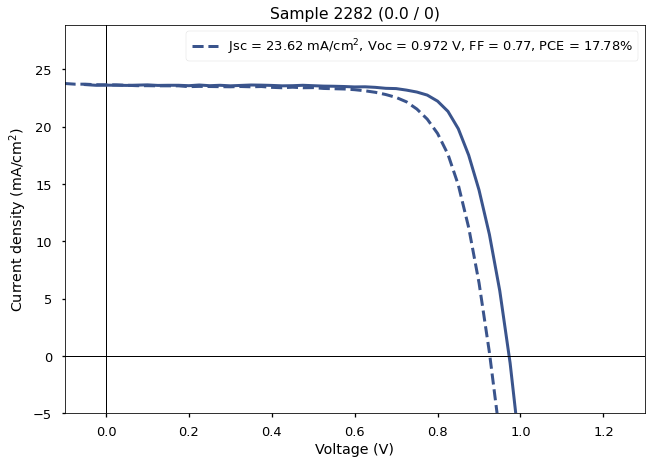

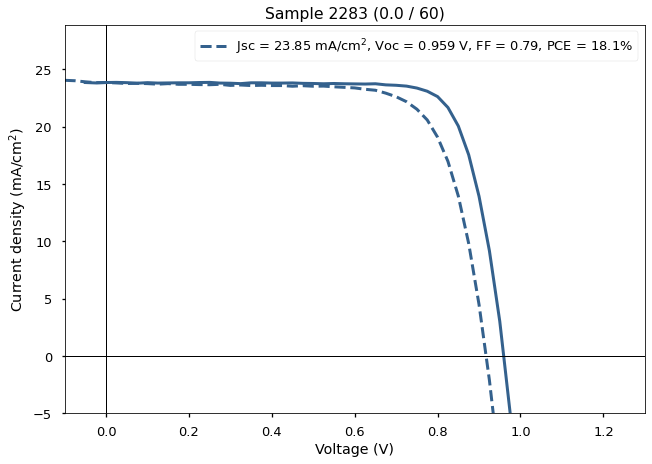

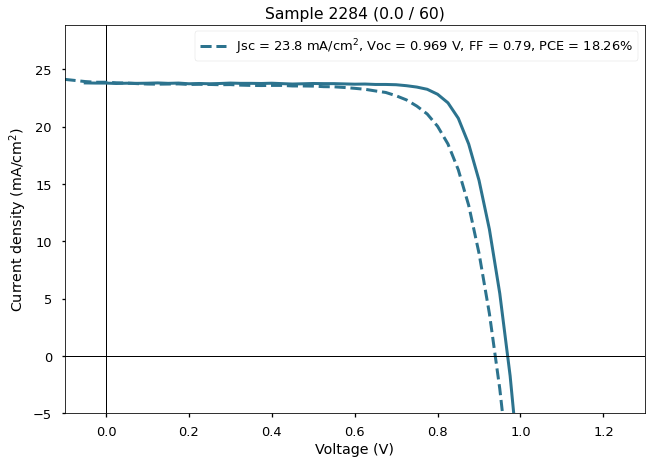

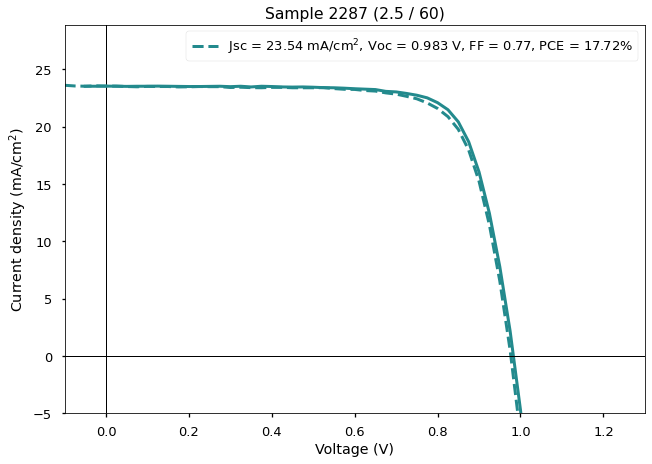

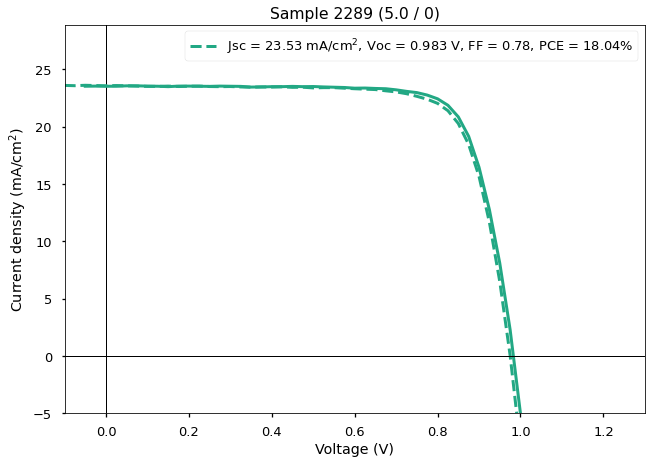

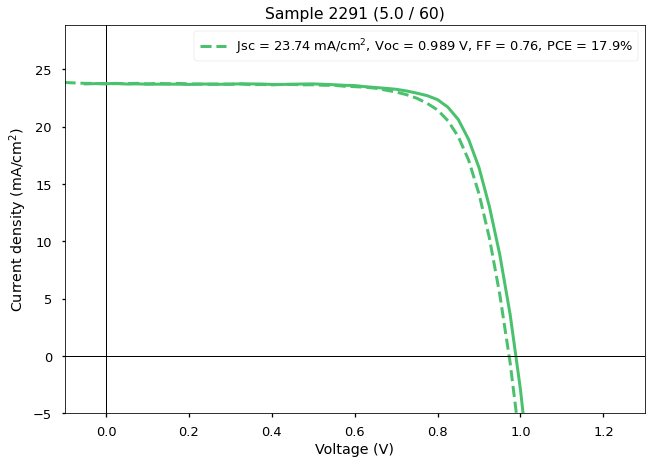

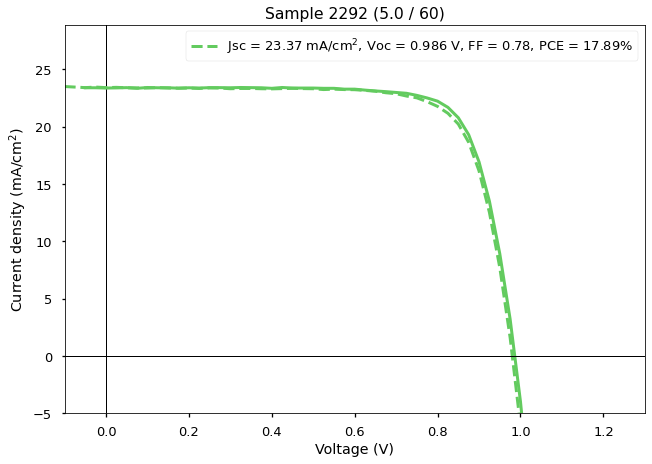

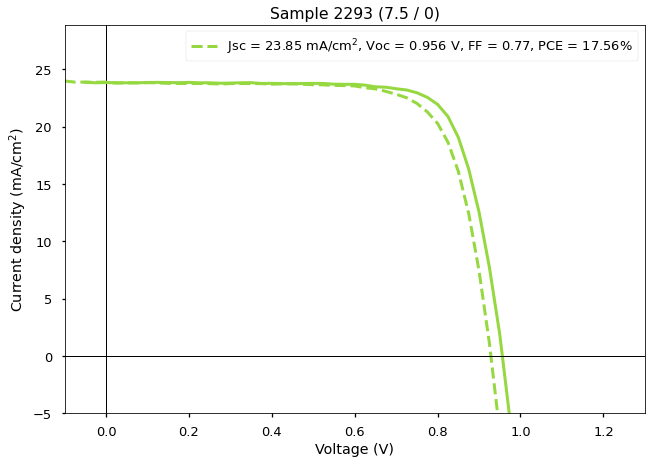

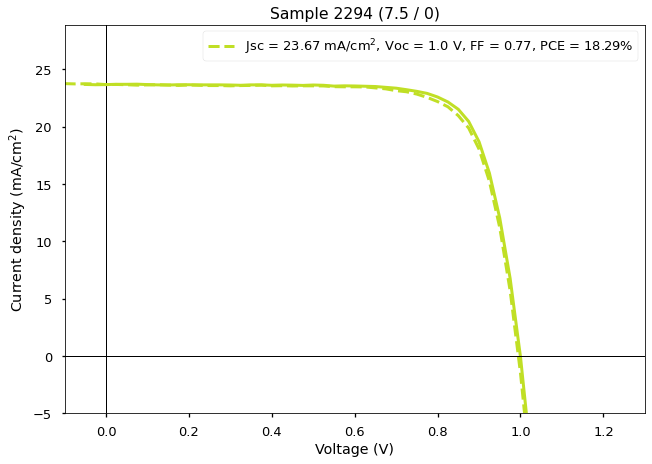

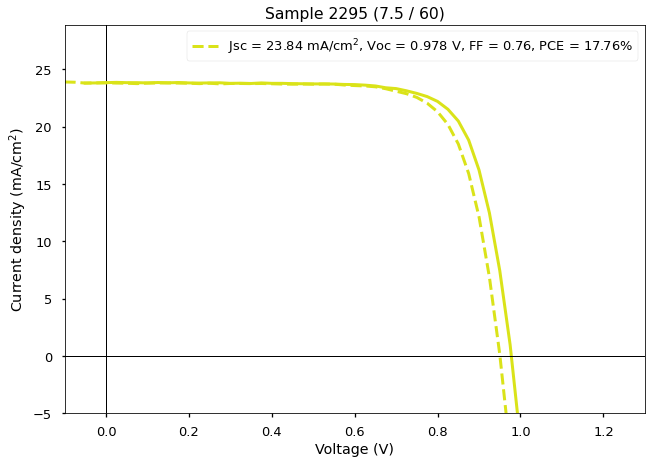

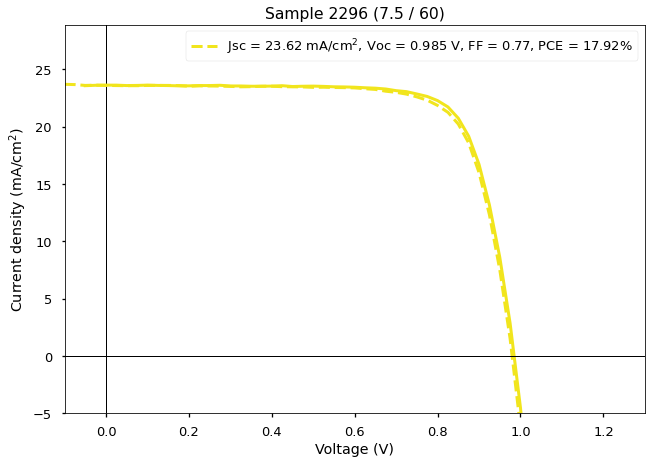

In [9]:
#Rev SCANS modified

scan = '*_rev_*.txt'

list_i = []
j = 0

import csv
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:

        datareader = csv.reader(csvfile)
        j+=1
        i=1
        for row in datareader:
            i+=1
            if 'HEADER END' in str(row):
                list_i.append(i)

skipnum = pd.Series(list_i)

jv_table = pd.DataFrame()
label_table = []

i=0
for filename in glob.glob(os.path.join(path, scan)):
    i+=1

    with open(filename, 'r') as f:                
        sample = re.split("[_.]", filename)[-7] 
        pixel = re.split("[_.]", filename)[-3][-1]
        scan = re.split("[_.]", filename)[-2] 
        run = re.split("[_.]", filename)[-8]
        run = re.split("/", run)[1]
        
        
        label = run+'_'+sample+'_'+pixel+'_'+scan
        label_table.append(label)
        j = i - 1
        
        data = pd.read_csv(f, sep='\t', error_bad_lines=False, skiprows=skipnum[j])

        jv_table['V'] = data.iloc[:,0]
        jv_table[label] = data.iloc[:,1]

        
jv_table.set_index('V', inplace=True)
jv_table.sort_index(axis=1, inplace=True)

V = jv_table.reset_index()['V'].to_numpy()


#fwd scans

scan = '*_fwd_*.txt'

skipnum = pd.Series()
list_i = []
j = 0
import csv
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:
        
        datareader = csv.reader(csvfile)
        j+=1
        i=1
        for row in datareader:
            i+=1

            if 'HEADER END' in str(row):
                list_i.append(i)

skipnum = pd.Series(list_i)

jv_table2 = pd.DataFrame()
i=0

for filename in glob.glob(os.path.join(path, scan)):
    i+=1
    with open(filename, 'r') as f:
        
        sample = re.split("[_.]", filename)[-7] 
        pixel = re.split("[_.]", filename)[-3][-1]
        scan = re.split("[_.]", filename)[-2] 
        run = re.split("[_.]", filename)[-8]
        run = re.split("/", run)[1]
 
        
        label = run+'_'+sample+'_'+pixel+'_'+scan
        
        label_table.append(label)
        j = i - 1
        
        try:
            data = pd.read_csv(f, sep='\t', error_bad_lines=False, skiprows=skipnum[j])
        except ValueError:
            pass

        jv_table2['V'] = data.iloc[:,0]
        jv_table2[label] = data.iloc[:,1]

jv_table2.set_index('V', inplace=True)
jv_table2.sort_index(axis=1, inplace=True)
V2 = jv_table2.reset_index()['V'].to_numpy()


#Plots the best JVs per sample

test_table = jv_table.T.reset_index()
test_table2 = jv_table2.T.reset_index()

sample_list = []
pce_list = []

for i in range(len(test_table)):
    
    sample = test_table.iloc[i,0].split('_')[1] #determining sample number
    sample_list.append(sample)
    
    pce = (test_table.iloc[i,1:]*V).max() #calculating pce 
    pce_list.append(pce)

test_table['Sample'] = sample_list
test_table['pce'] = pce_list
sample_list = []
pce_list = []    
    
for i in range(len(test_table2)):
    sample = test_table2.iloc[i,0].split('_')[1]

    sample_list.append(sample)
    
    pce = (test_table2.iloc[i,1:]*V).max()
    pce_list.append(pce)

test_table2['pce'] = pce_list


sample_list = []

for i in range(len(test_table2)):
    sample = test_table2.iloc[i,0].split('_')[1]
    sample_list.append(sample)

    
test_table2['Sample'] = sample_list


test_table = pd.merge(test_table, labels, on='Sample')
test_table2 = pd.merge(test_table2, labels, on='Sample')









test_table = test_table[test_table[0.0]<26]

max_table = test_table.groupby('Sample')['pce'].max().reset_index()

analysis_dir = experiment+"JVs"

try:  
    os.mkdir(output_path+'JVs')
except OSError as error:  
    pass 


jv_label_list = []
jv_list = []

for k in range(len(test_table)):
    
    d = (np.where(max_table['pce'].to_numpy()==test_table['pce'].iloc[k])[0])
    
    test_var1 = (test_table['Sample'].iloc[k])
    test_var2 = (max_table['Sample'].iloc[d]).max()
    
    if (test_table['pce'].iloc[k] in max_table['pce'].to_numpy()) and (test_var1 == test_var2):
        
        variable1 = test_table[variable_1.name].iloc[k]
        
        if len(variable_3)>0:
            variable2 = test_table[variable_2.name].iloc[k]
            variable3 = test_table[variable_3.name].iloc[k]
        elif len(variable_2)>0:
            variable2 = test_table[variable_2.name].iloc[k]

        y = test_table.iloc[k,1:-6]#.to_numpy()
        x = test_table.iloc[1,1:-6].reset_index()['index']
        
        for m in range(len(test_table2)):
            #print(test_table2.iloc[m,0])
            #print(test_table.iloc[k,0])
            #print()
            
            if test_table2.iloc[m,0] == test_table.iloc[k,0]:
                y2 = test_table2.iloc[m,1:-6]#to_numpy()
                #print(len(y2))
        
        x2 = test_table2.iloc[1,1:-6].reset_index()['index']
        Jsc = round(y[np.where(V==0)[0][0]],2)
        
        
        a = 15
        
        yy = np.array(y)
        X = V[np.where((yy<a ) & (yy> -a))]

        Y = yy[np.where((yy<a ) & (yy> -a))]
        
 
        f = interpolate.interp1d(X, Y)
        xnew = np.linspace(X.min(), X.max(), 10000)
        ynew = f(xnew)

        Voc = round(xnew[np.where(abs(ynew) == abs(ynew).min())[0][0]],3)
        PCE = round((x*yy).max(),2)
        FF = round(PCE/(Jsc*Voc),2)
                
        plt.style.use('seaborn-talk')
  
             
        n=len(test_table)
        colors = plt.cm.viridis(np.linspace(0,1,n))    

        plt.plot(x2,y2,'--', lw=3, color=colors[k],label=sample_list[k])  #color=colors[k]
        plt.plot(x,y,'-', lw=3, color=colors[k],label=sample_list[k])

        plt.legend(['Jsc = {} mA/cm$^2$, Voc = {} V, FF = {}, PCE = {}%'.format(Jsc, Voc, FF, PCE)], loc='best')

        if len(variable_3) > 0:
            plt.title('Sample '+test_var1+ ' ({} / {} / {})'.format(variable1, variable2, variable3))
        elif len(variable_2) > 0 and len(variable_3)==0:
            plt.title('Sample '+test_var1+' ({} / {})'.format(variable1, variable2))
        elif len(variable_2) ==0:
            plt.title('Sample '+test_var1+' ({})'.format(variable1))
            

        
        ymax = parameters['Jsc'].max()*1.2
        
        if ymax > 32:
            ymax = 28
        
        
        plt.ylim(-5, ymax)
        plt.xlim(-0.1,1.3)

        plt.xlabel('Voltage (V)')
        plt.ylabel(r'Current density (mA/cm$^2$)')
        plt.axhline(y = 0, color = 'black', lw = 1, linestyle = '-') 
        plt.vlines(x = 0, ymin =-10, ymax = 50, color = 'black', lw = 1)
        #plt.text(0.2,5,'Jsc = {} mA/cm$^2$, Voc = {} V, FF = {}, PCE = {}%'.format(Jsc, Voc, FF, PCE))

        PCE = str(PCE).split('.')

        plt.savefig(output_path+'JVs'+'/' +test_var1+  '_best-JV_'+PCE[0]+'-'+PCE[1], dpi = 300)
        plt.show()
   

In [10]:
### Plot SPOs

scan = '*_SPO*.txt'
skipnum = pd.Series()
list_i = []
j = 0
import csv
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:

        datareader = csv.reader(csvfile)
        j+=1
        i=1
        for row in datareader:
            i+=1

            if 'HEADER END' in str(row):
                list_i.append(i)

skipnum = pd.Series(list_i)
spo_table = pd.DataFrame()
i=0

for filename in glob.glob(os.path.join(path, scan)):
    i+=1

    with open(filename, 'r') as f: 

        sample = re.split("[_.]", filename)[-6]

        pixel = re.split("[_.]", filename)[-3][-1]      
        j = i - 1
        
        data = pd.read_csv(f, sep='\t', error_bad_lines=False, skiprows=skipnum[j])

        spo_table['time'] = data.iloc[:,3]
        spo_table[sample+'_'+pixel+'_'+str(i)] = data.iloc[:,2]

spo_table.set_index('time', inplace=True)
spo_table.sort_index(axis=1, inplace=True)

time = spo_table.reset_index()['time'].to_numpy()

plot_table = pd.DataFrame()

plot_table = spo_table.T.reset_index()

sample_list = []
spo_list = []


for i in range(len(plot_table)):
    sample = plot_table.iloc[i,0].split('_')[0]
    sample_list.append(sample)
    spo = plot_table.iloc[i,-5:].mean()
    spo_list.append(spo)

plot_table['Sample'] = sample_list
plot_table['SPO'] = spo_list
plot_table = pd.merge(plot_table, labels, on='Sample')

box_table = pd.DataFrame()
box_table['Sample'] = sample_list
box_table['SPO'] = spo_list
box_table = pd.merge(box_table, labels, on='Sample')

max_table = plot_table.groupby('Sample')['SPO'].max().reset_index()


try:  
    os.mkdir(output_path+'SPOs')
except OSError as error:  
    pass 



for k in range(len(plot_table)):
    #print(plot_table['SPO'].iloc[k])
    
    
    d = (np.where(max_table['SPO'].to_numpy()==plot_table['SPO'].iloc[k])[0])
    #print(d)
    
    test_var1 = (plot_table['Sample'].iloc[k])

    test_var2 = (max_table['Sample'].iloc[d]).max()

    #defining variables:
    
    if len(plot_table.columns) == 22: 
        #4 variables exist
        variable4 = plot_table.iloc[k,21]
        variable3 = plot_table.iloc[k,20]
        variable2 = plot_table.iloc[k,19]
        variable1 = plot_table.iloc[k,18]
    if len(plot_table.columns) == 21: 
        #3 variables exist
        variable3 = plot_table.iloc[k,20]
        variable2 = plot_table.iloc[k,19]
        variable1 = plot_table.iloc[k,18]
    if len(plot_table.columns) == 20: 
        #2 variables exist
        variable2 = plot_table.iloc[k,19]
        variable1 = plot_table.iloc[k,18]
    if len(plot_table.columns) == 20: 
        #1 variable exist
        variable1 = plot_table.iloc[k,18]    
    
    if (plot_table['SPO'].iloc[k] in max_table['SPO'].to_numpy()) and (test_var1 == test_var2):
        

        
        x = plot_table.iloc[1,6:-5].reset_index()['index']
        y = plot_table.iloc[k,6:-5]
        

        tck = interpolate.splrep(x,y, s=0.1)

        xnew = np.linspace(min(x), max(x), len(x)*100)
        ynew = interpolate.splev(xnew, tck, der=0)
        trend = (np.gradient(ynew).mean())*10**5
        
        if (trend > -1) and (trend < 1):
            trend = 'stable'
        elif trend < -1:
            trend = 'negative'
        elif trend > 1:
            trend = 'positive'

        
        SPO = round(plot_table['SPO'].iloc[k],2)
        n=len(plot_table)
        colors = plt.cm.viridis(np.linspace(0,1,n))    

        plt.title(test_var1+ '\n' +
                  ' {}: {} / {}: {} / {}: {}'.format(variable_1.name, variable1, variable_2.name, variable2, variable_3.name, variable3)+
                  "\n"+str(SPO)+'%, '+ trend)
       


        plt.plot(xnew,ynew,'--', color=colors[k],label=sample_list[k])
        plt.plot(x,y,'o', color=colors[k],label=sample_list[k])
        
        
        
        plt.xlabel('Time (s)')
        plt.ylabel(r'Power output (mW/cm$^2$)')
        
      
        SPO = str(SPO).split('.')


        plt.savefig(output_path+'SPOs'+'/' +test_var1+  '_best-SPO_'+SPO[0]+'-'+SPO[1]+'_'+trend, dpi = 300)
        plt.show()

AttributeError: 'list' object has no attribute 'name'

In [90]:
plot_table.iloc[4,20]

15

In [101]:
SPO

['16', '78']

In [56]:
box_table

,Sample,SPO,KCl (mg/ml),O2 (W),DDAI (mg/ml)
0,2157,16.05166,0.0,0,0
1,2157,15.96834,0.0,0,0
2,2158,16.31448,0.0,0,0
3,2159,16.10390,0.0,0,15
4,2160,16.57776,0.0,0,15
5,2161,15.96192,0.0,20,0
6,2161,15.93626,0.0,20,0
7,2162,15.78246,0.0,20,0
8,2162,15.96200,0.0,20,0
9,2162,15.91564,0.0,20,0


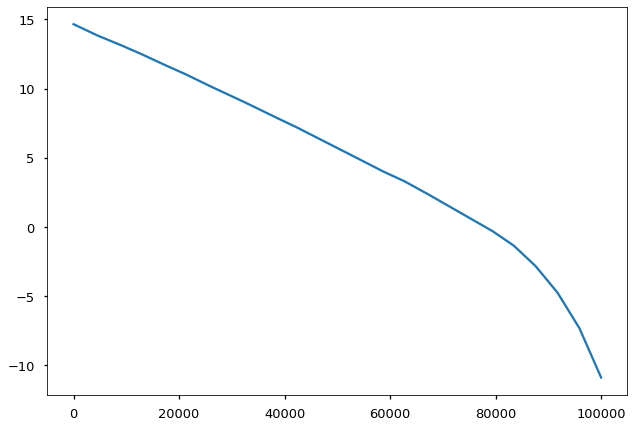

<AxesSubplot:xlabel='MACl', ylabel='SPO'>

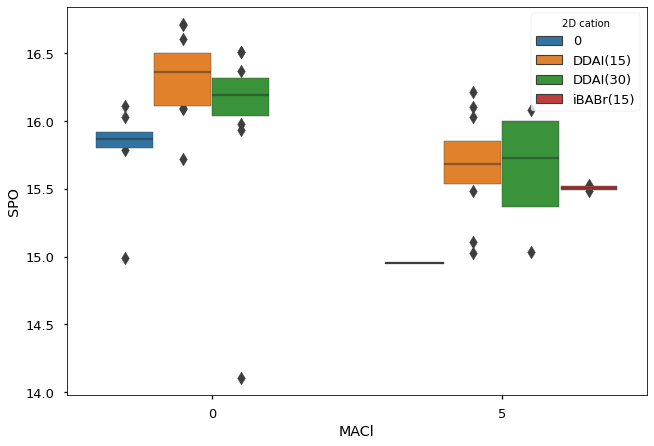

In [99]:
box_table
x = 'MACl'
hue= '2D cation'
y= 'SPO'

#sns.swarmplot(x,y,hue, data=box_table, color='darkgrey')
#sns.boxplot(x, y,hue, data=box_table )
sns.boxenplot(x, y,hue, data=box_table )


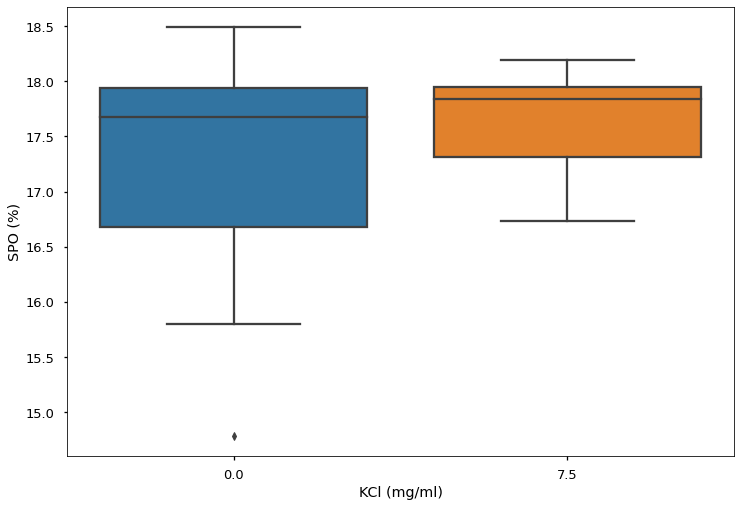

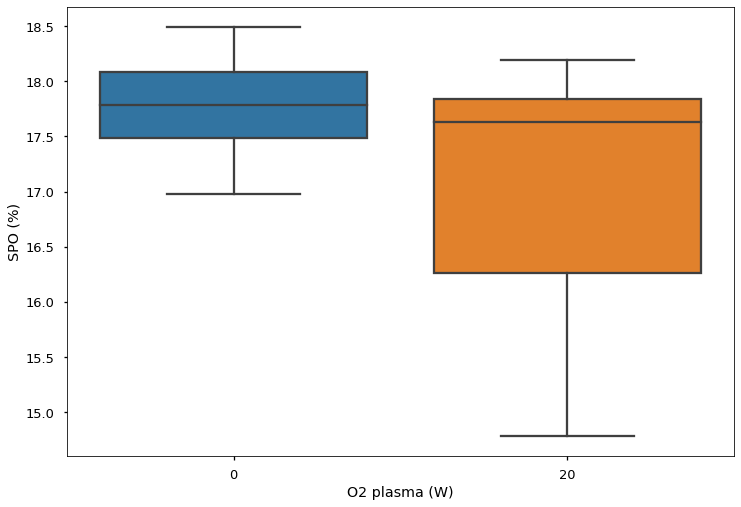

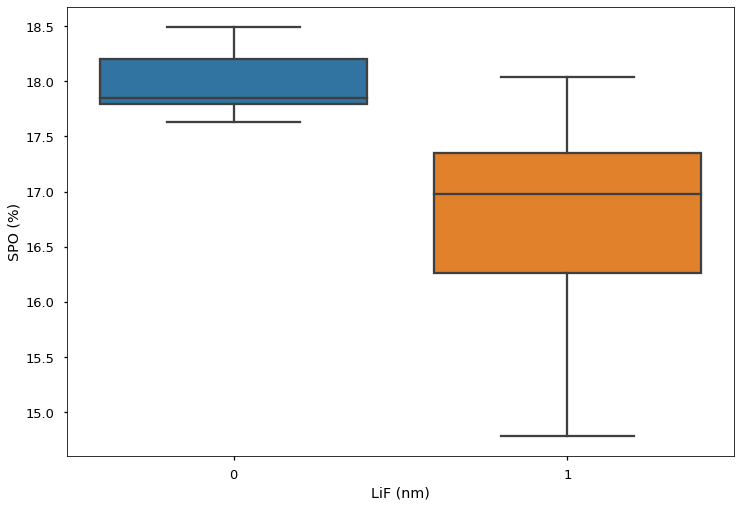

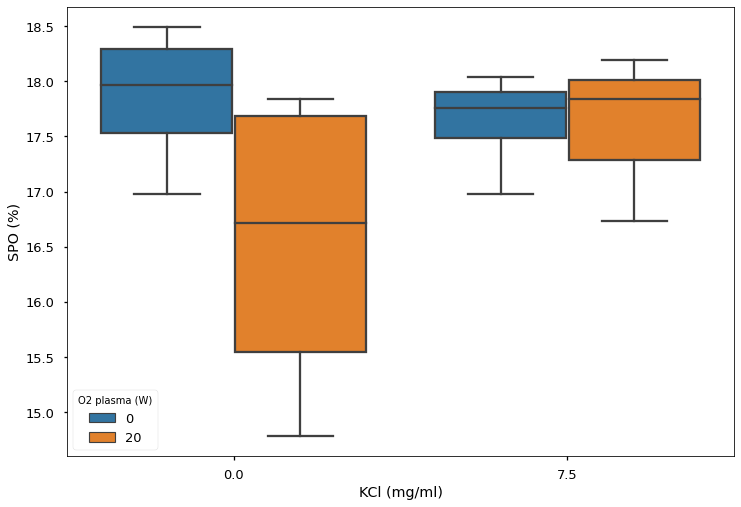

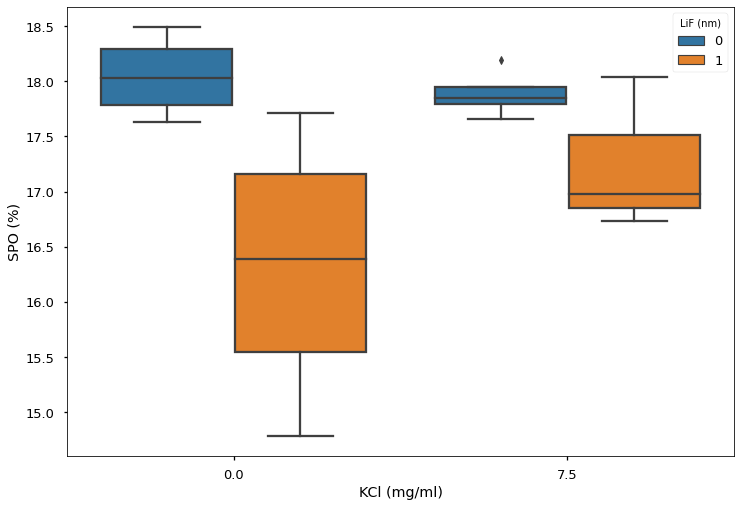

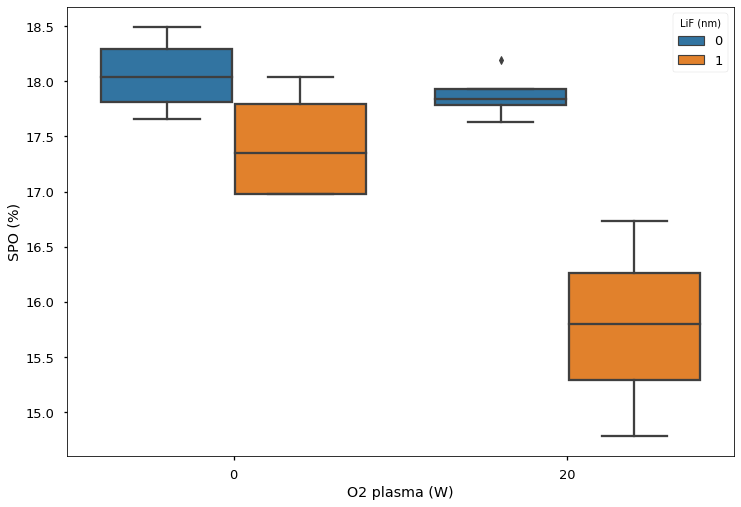

In [8]:
### Boxplots of the various variables (SPO stats)


plt.style.use('seaborn-talk')

data = box_table

if 'SPO' in box_table.columns:
    
    y  = data['SPO']
        
    if (len(variable_2)>0) and (len(variable_3) == 0):
        for n in range(3):
            if n == 0:
                x = variable_1
                hue = None
                ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            elif n == 1:
                x = variable_2
                hue = None
                ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            elif n == 2:
                x  = variable_1
                hue = variable_2
            else:
                pass
            
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('SPO (%)')
            plt.tight_layout()
            export = output_path+experiment+'_'+'SPO_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
            
            
    elif len(variable_3)>0:
        for n in range(6):
            data = max_table
            y = data['SPO']
            if n == 0:
                x = variable_1
                hue = None
            elif n == 1:
                x = variable_2
                hue = None
            elif n == 2:
                x = variable_3
                hue = None
            
            elif n == 3: 
                x  = variable_1
                hue = variable_2
            elif n == 4:
                x  = variable_1
                hue = variable_3
            elif n == 5:
                x  = variable_2
                hue = variable_3
            else:
                pass
            #if hue == None:
             #   ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
            #else:
             #   pass
            ax = sns.boxplot(x,y,  data=data, hue=hue)
            
            plt.ylabel('SPO (%)')
            plt.tight_layout()
            export = output_path+experiment+'_'+'SPO_'+str(n)
            plt.savefig(export, dpi = 300) #Saves file at with parameter name
            plt.show()
        
    else:

        hue = None
        x = variable_1
        
        ax = sns.swarmplot(x,y, data=data, hue=hue, color='darkgrey')
        ax = sns.boxplot(x,y,  data=data, hue=hue)
        
    
        plt.ylabel('SPO (%)')
        plt.tight_layout()
        export = output_path+experiment+'_'+'SPO_stats'
        plt.savefig(export, dpi = 300) #Saves file at with parameter name
        plt.show()

else:
    pass

In [45]:

path = askdirectory()



In [41]:
path

'/Users/shabisre/NREL/Experiments/SolarSim/Analysis'

In [47]:
for filename in glob.glob(os.path.join(path, scan)):
    with open(filename, 'r') as csvfile:
        print(filename)

In [46]:
path

'/Users/shabisre/NREL/Experiments/SolarSim/Analysis'

In [50]:
import os
file_list = []
user_dir = path
for dirpath,_,filenames in  os.path.walk(user_dir):
     for name in filenames:
        if name.endswith('.txt'):
             file_list.append(os.path.join(user_dir,dirpath,name))



AttributeError: module 'posixpath' has no attribute 'walk'

In [62]:
DIRECTORY = path

for root, dirs, files in os.path.walk(DIRECTORY):
    for file in files:
        #print(file)
        if glob.fnmatch.fnmatch(file, '*.png'):
            print(file)


AttributeError: module 'posixpath' has no attribute 'walk'

In [58]:
path

'/Users/shabisre/NREL/Experiments/SolarSim/Analysis'

In [63]:
import os
print(os.name)

posix
